In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis

import lsfit
reload(lsfit)

import include_modules_root as rt
import Kalman_tom


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [36]:
# Figure save path prefix
savefig.fig_prefix = "plots/singletrack_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = True         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [5]:
data_ind = 0
data_name = name_list[data_ind]


Data_all=[]

for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    print(f"Reading {data_name} files")

    Data=[]
    for i in range(len(energy_list)):
        Data.append(lsfit.get_km(file_list[data_name][i]))
        
    Data_all.append(Data)

  0%|          | 0/39990 [00:00<?, ?it/s]/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 39990/39990 [00:09<00:00, 4349.23it/s]
/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 40000/40000 [00:11<00:00, 3404.02it/s]


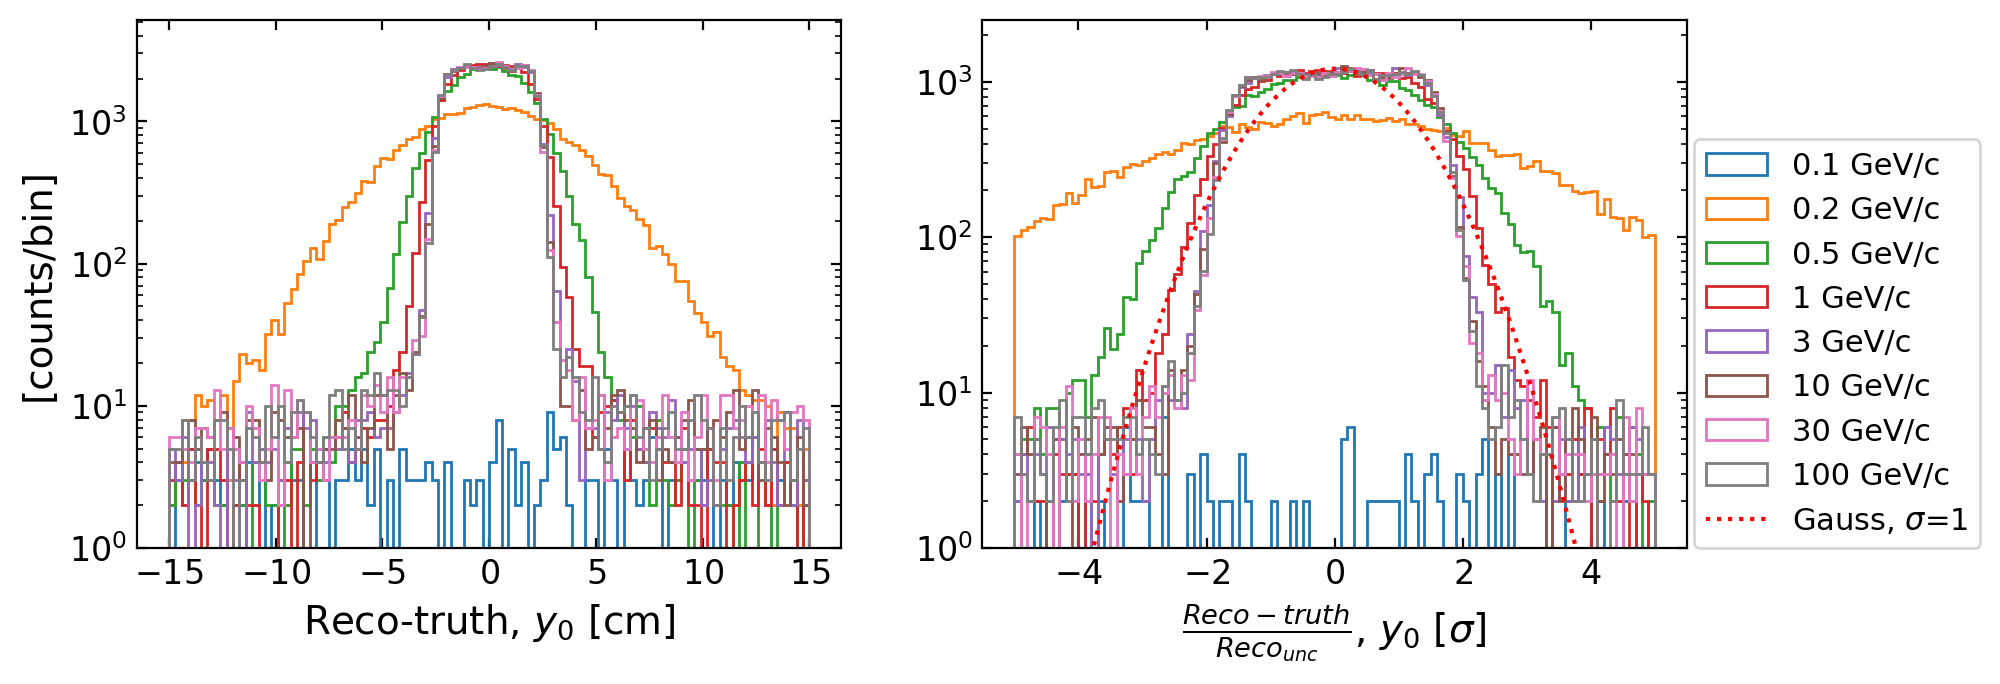

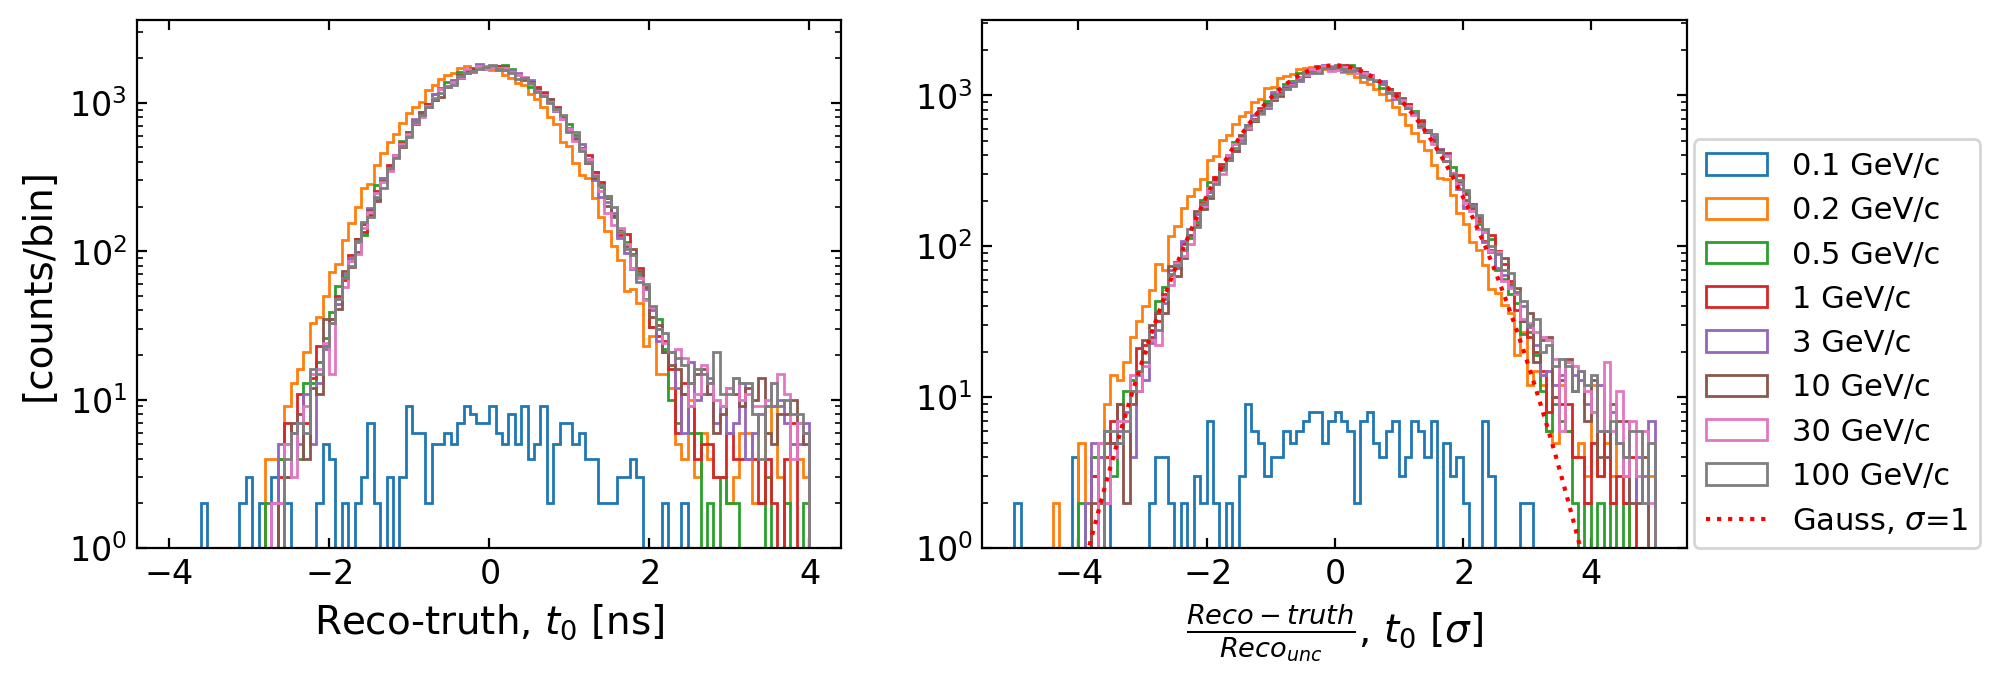

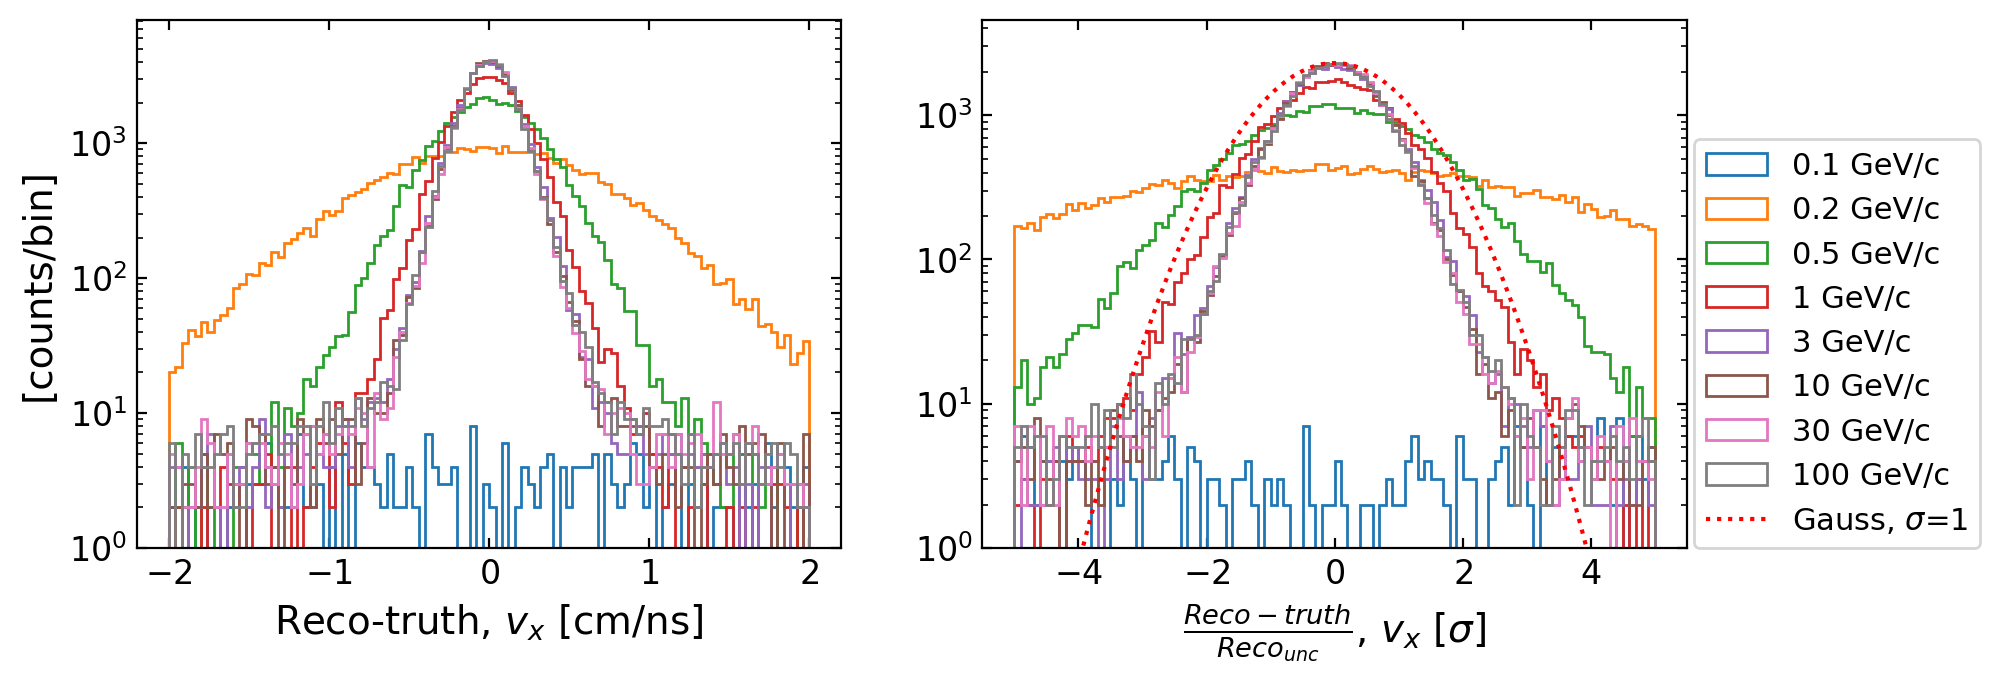

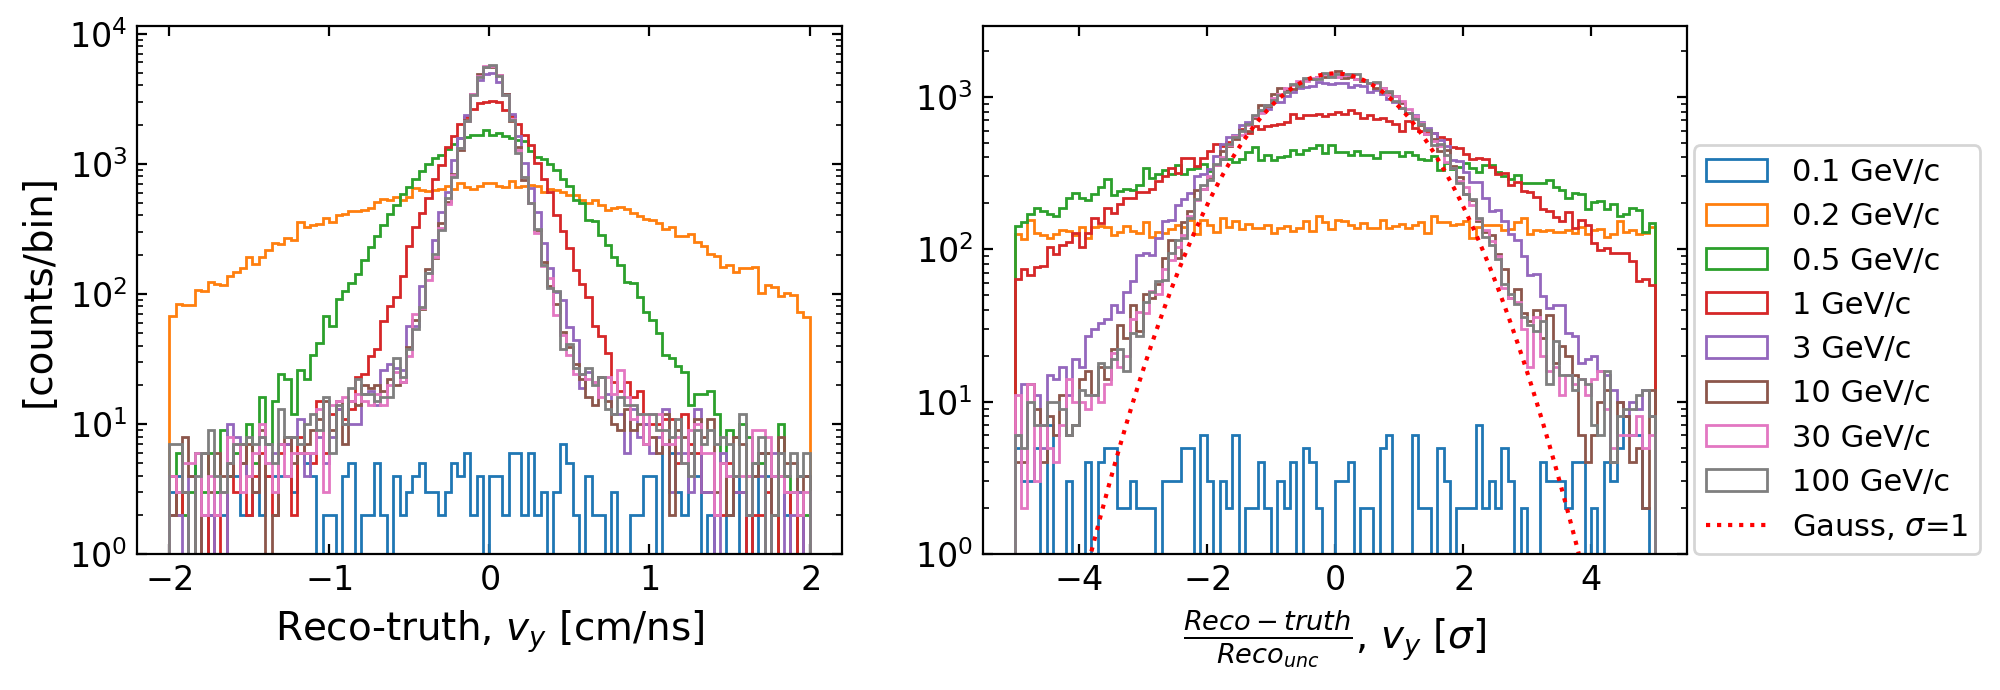

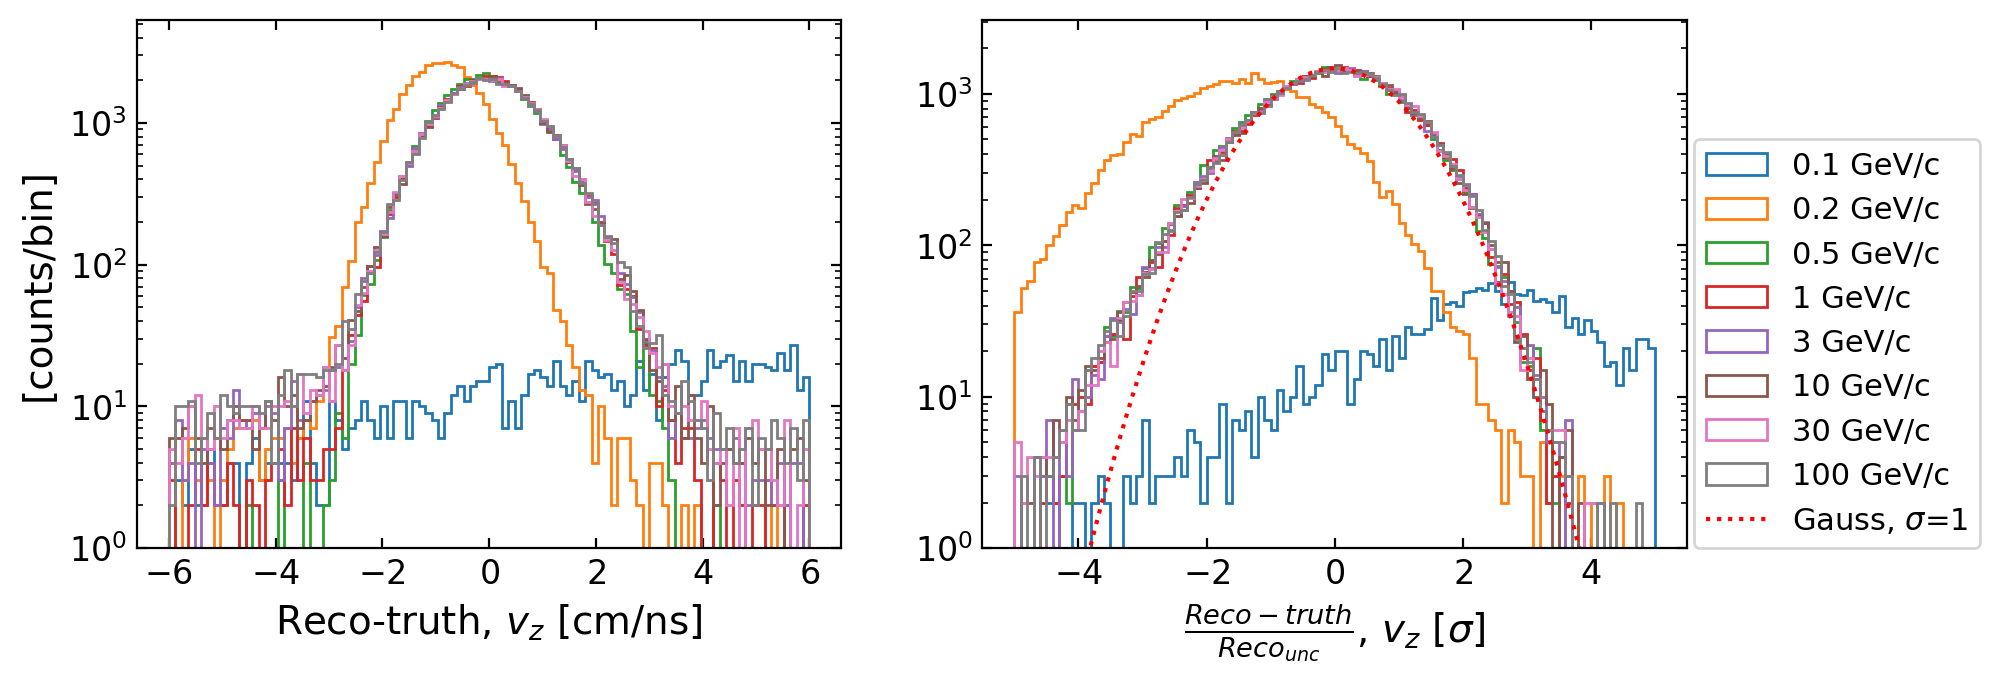

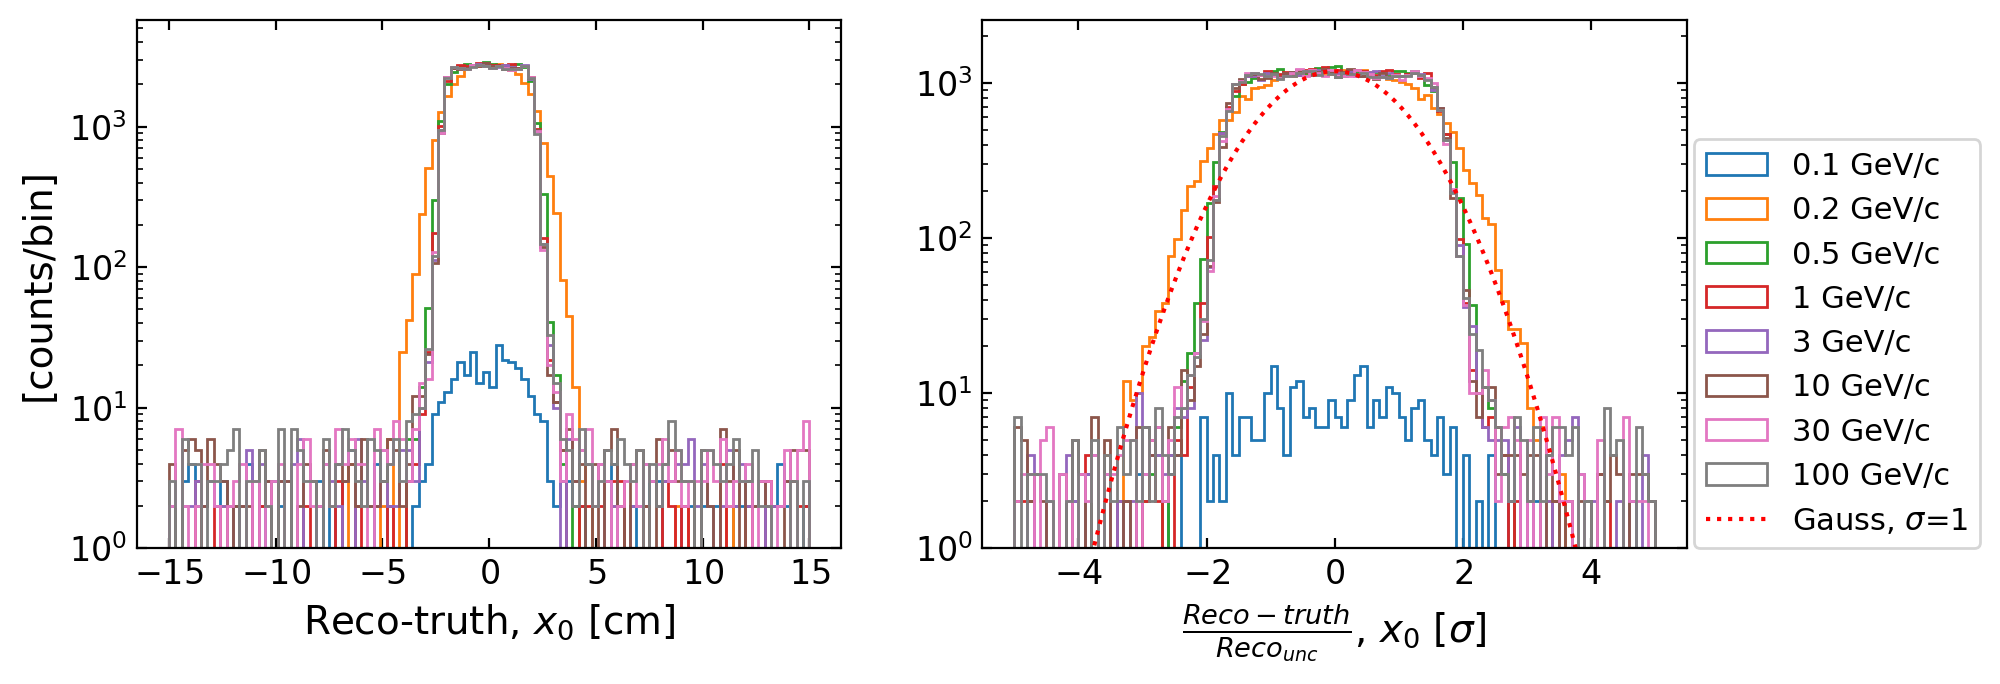

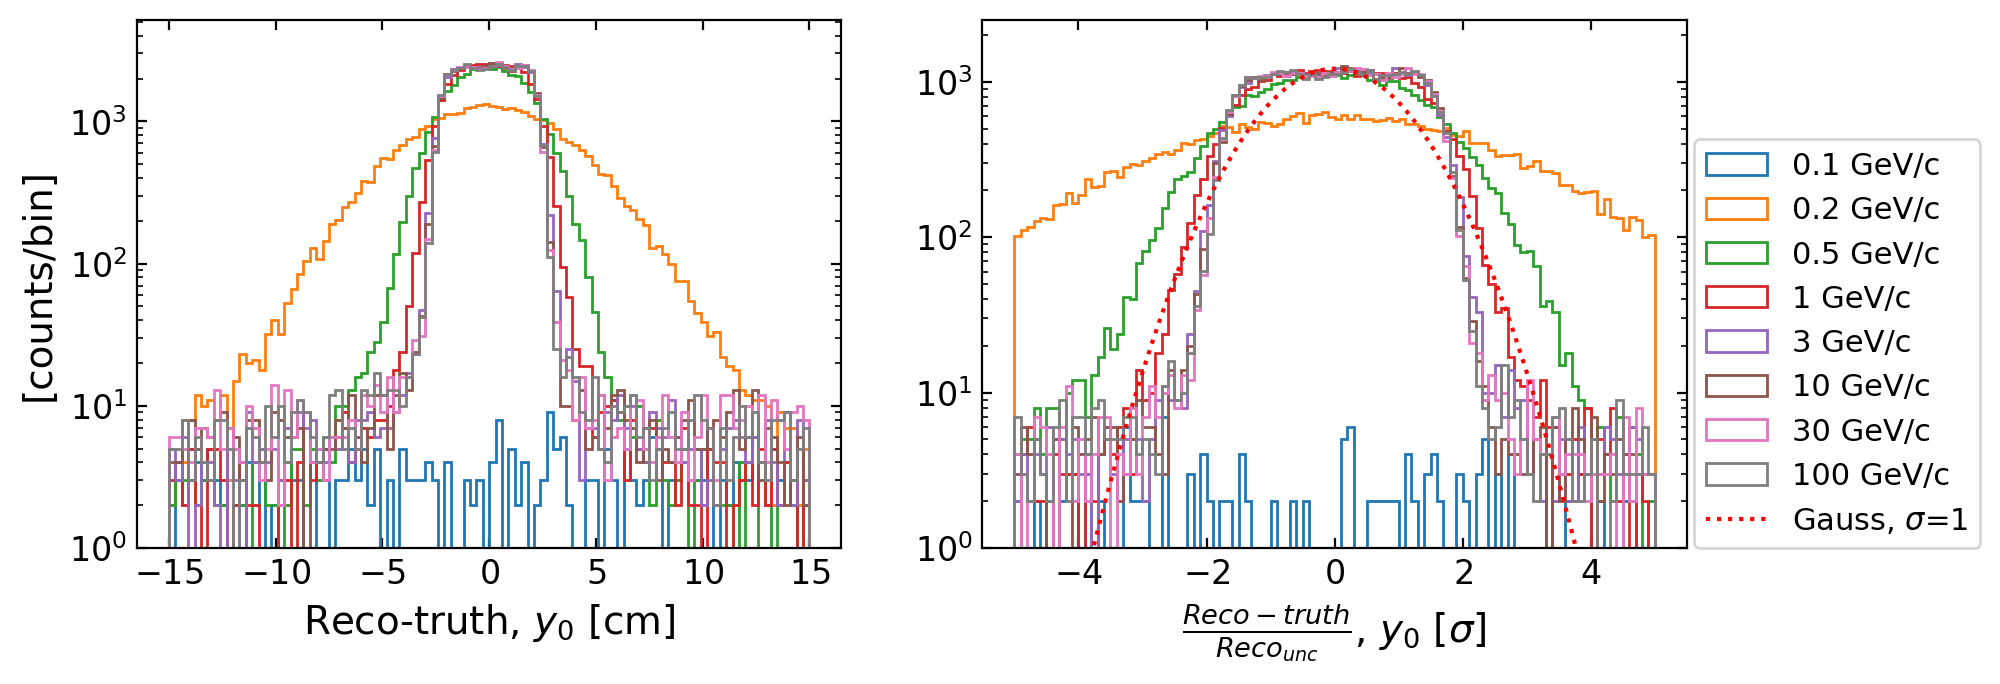

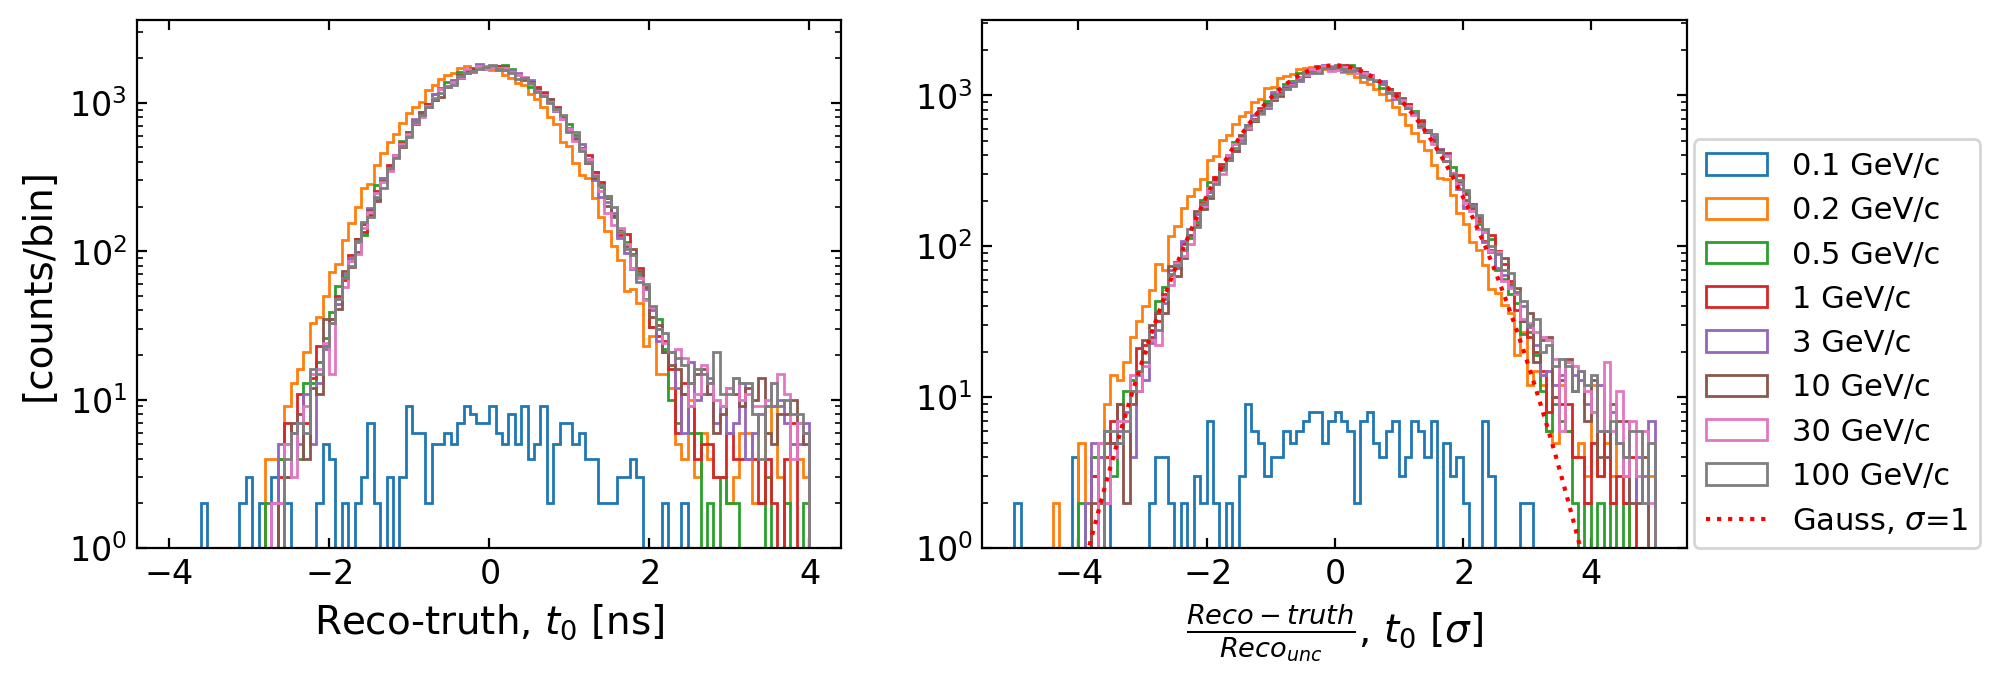

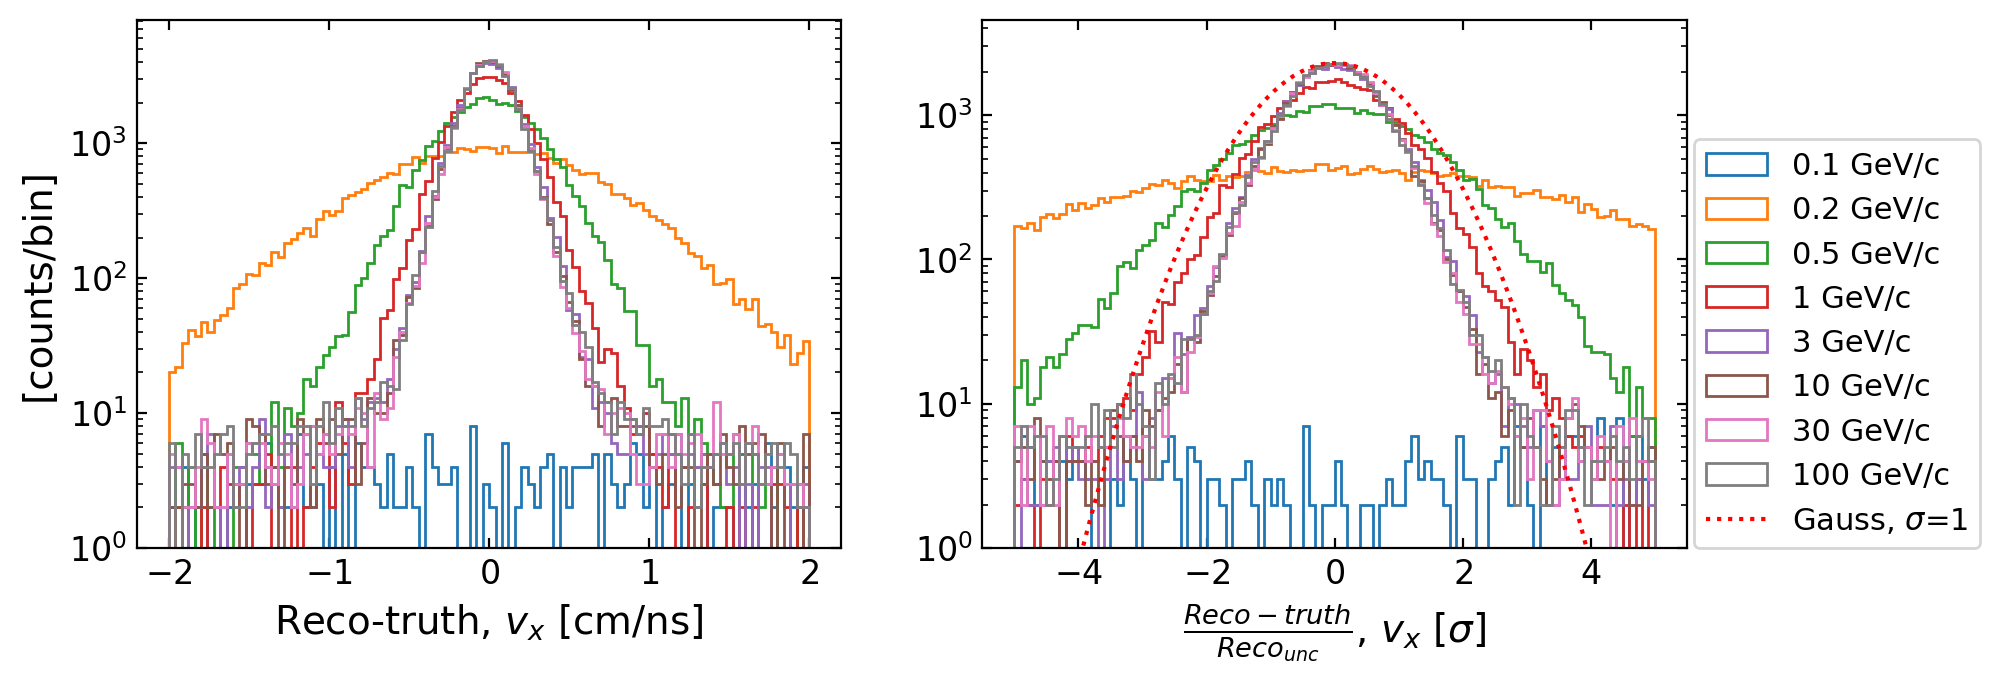

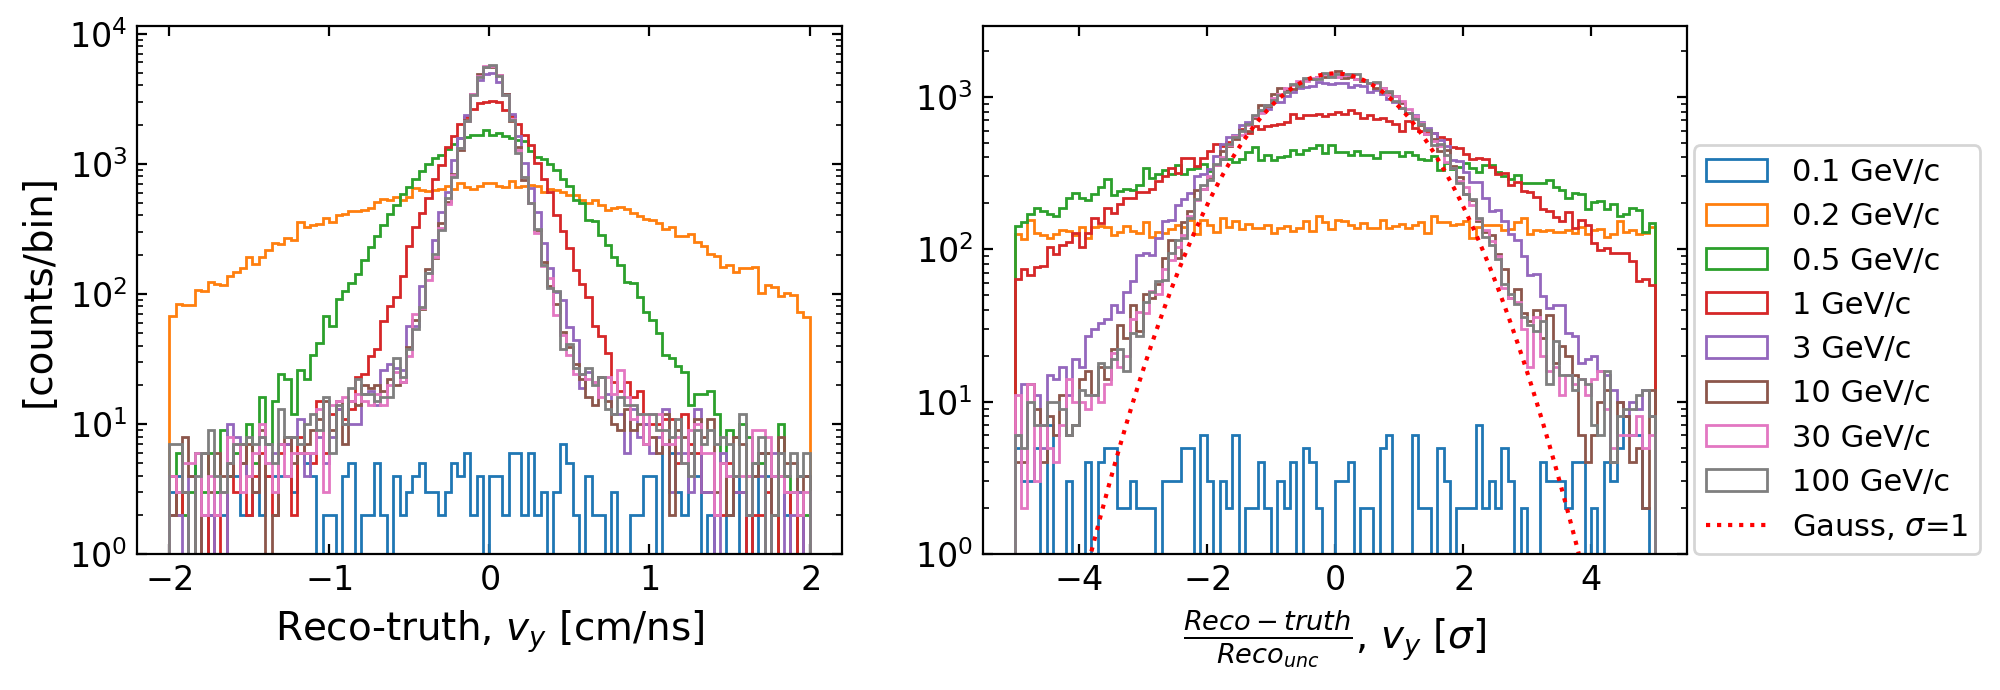

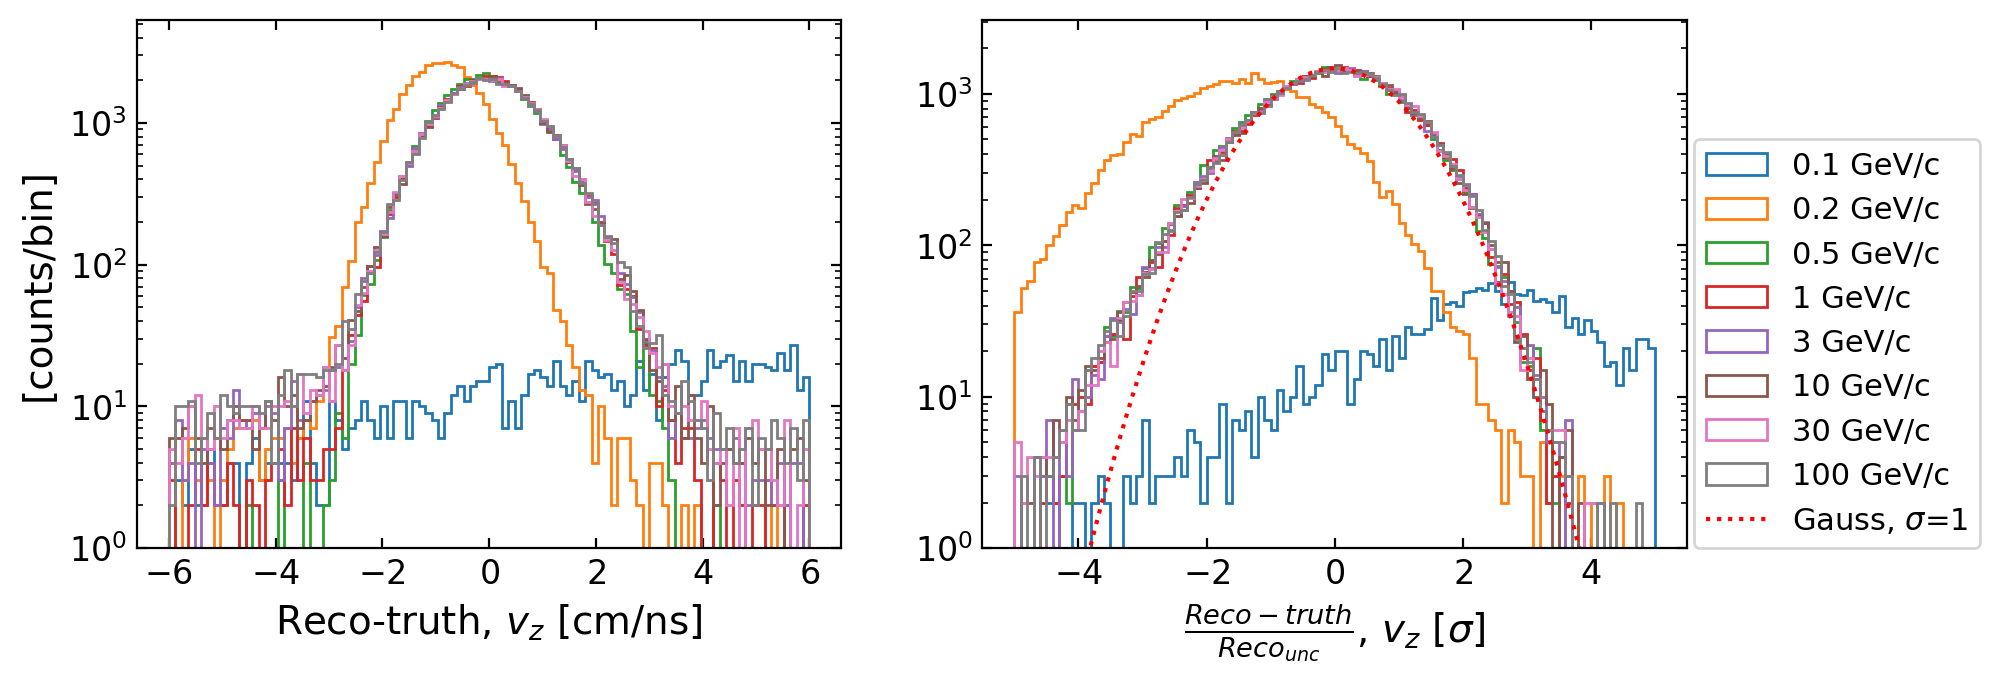

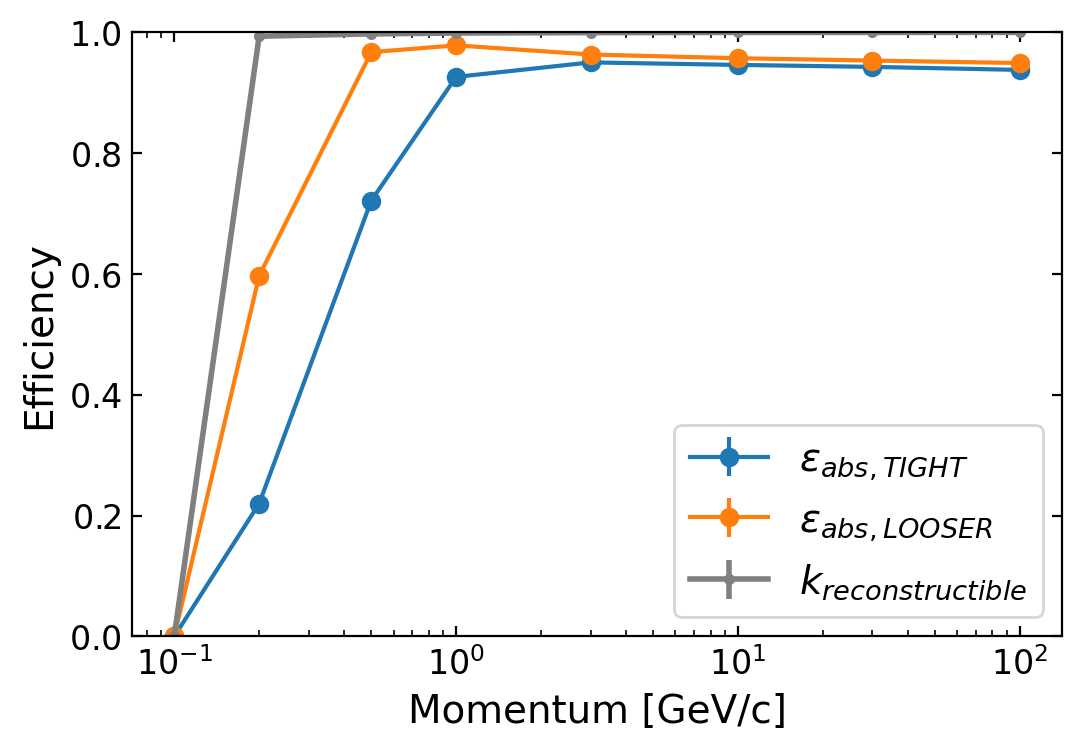

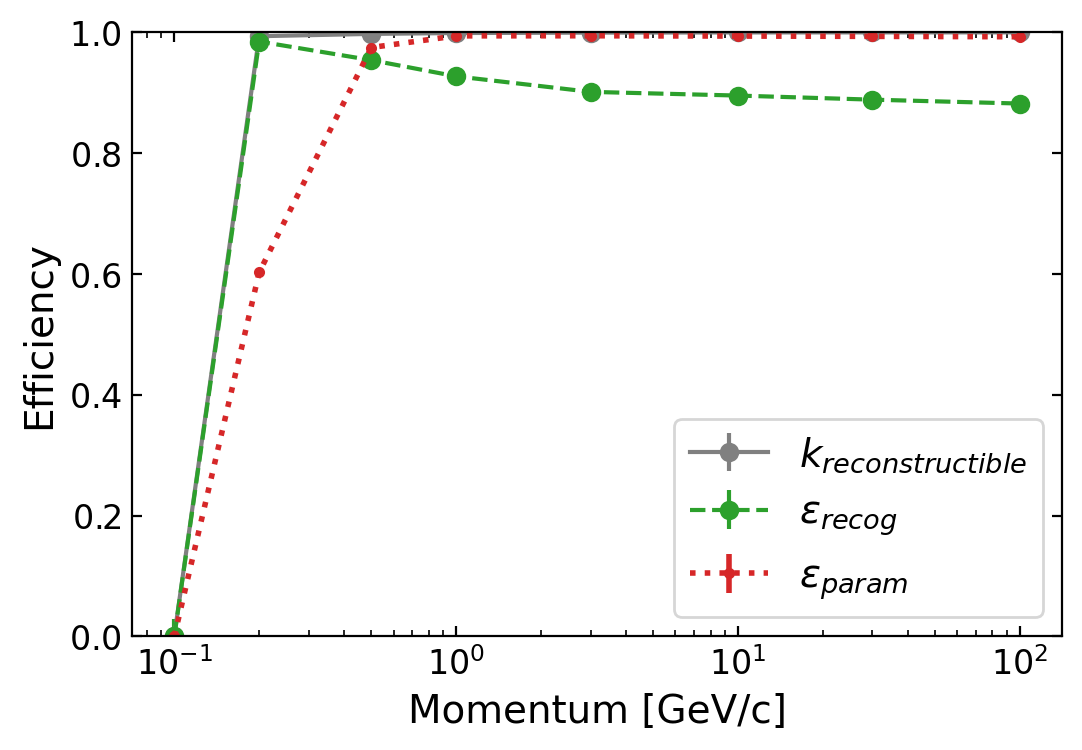

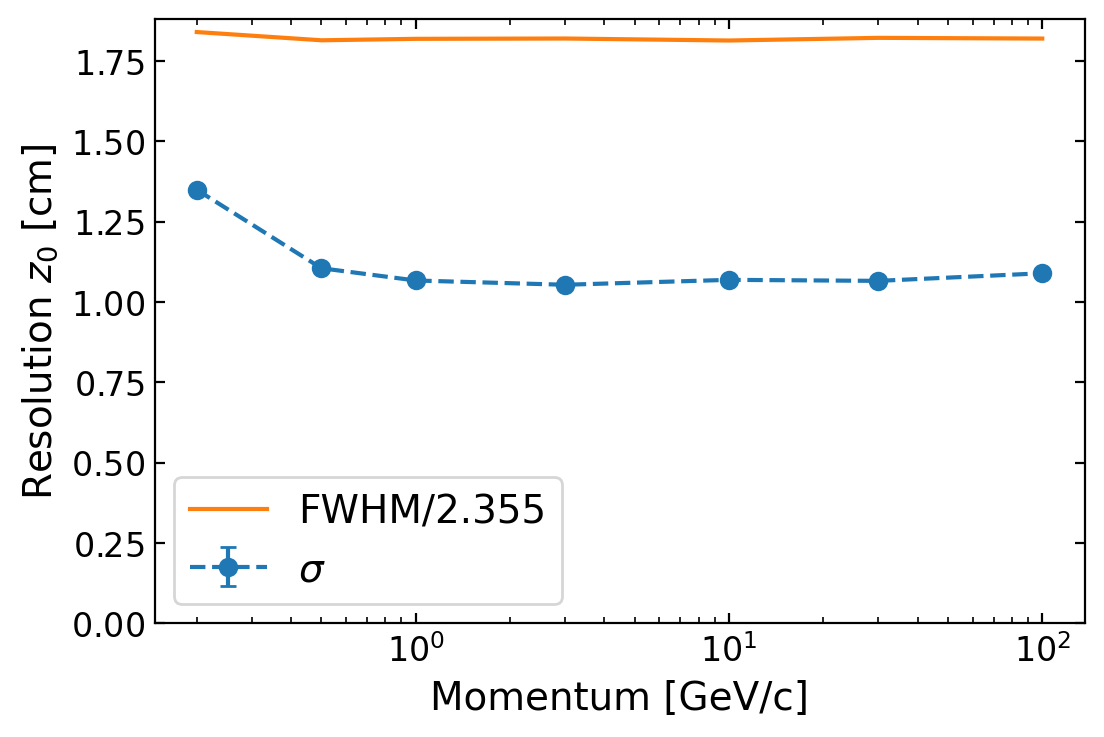

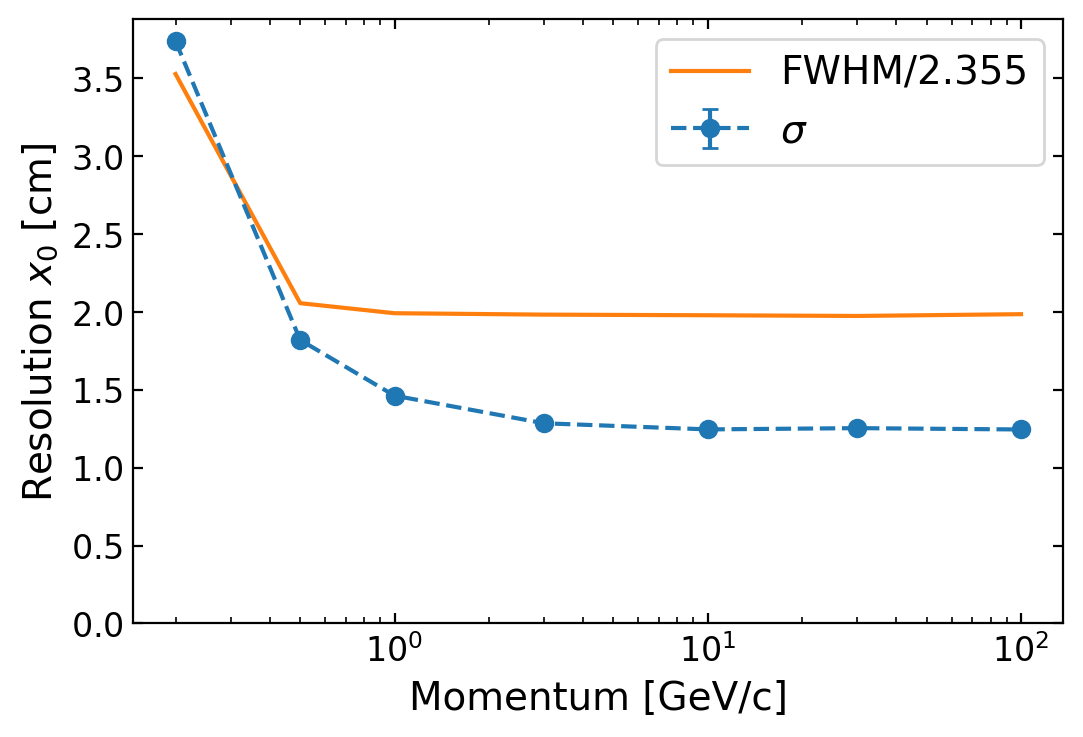

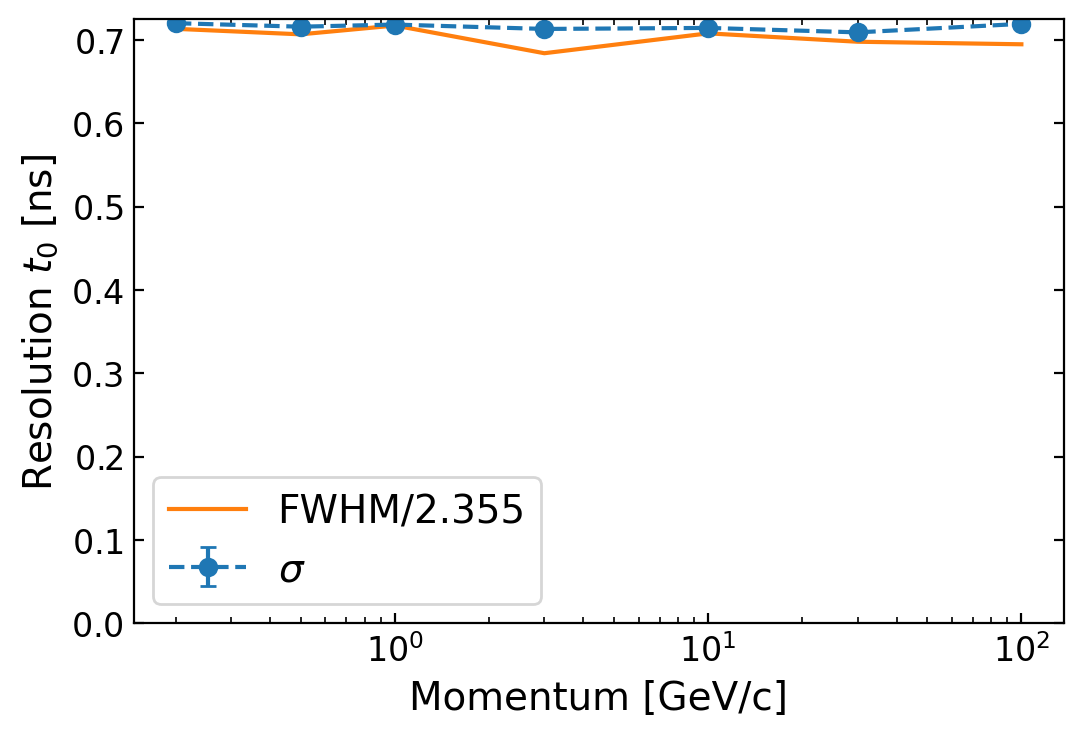

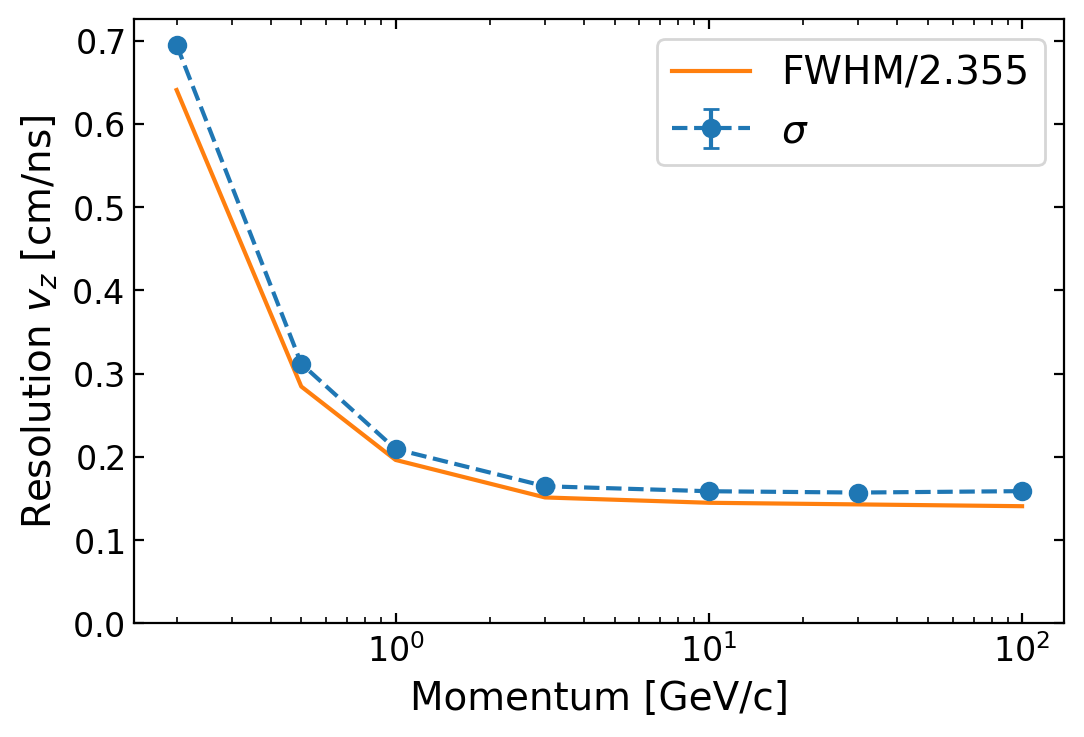

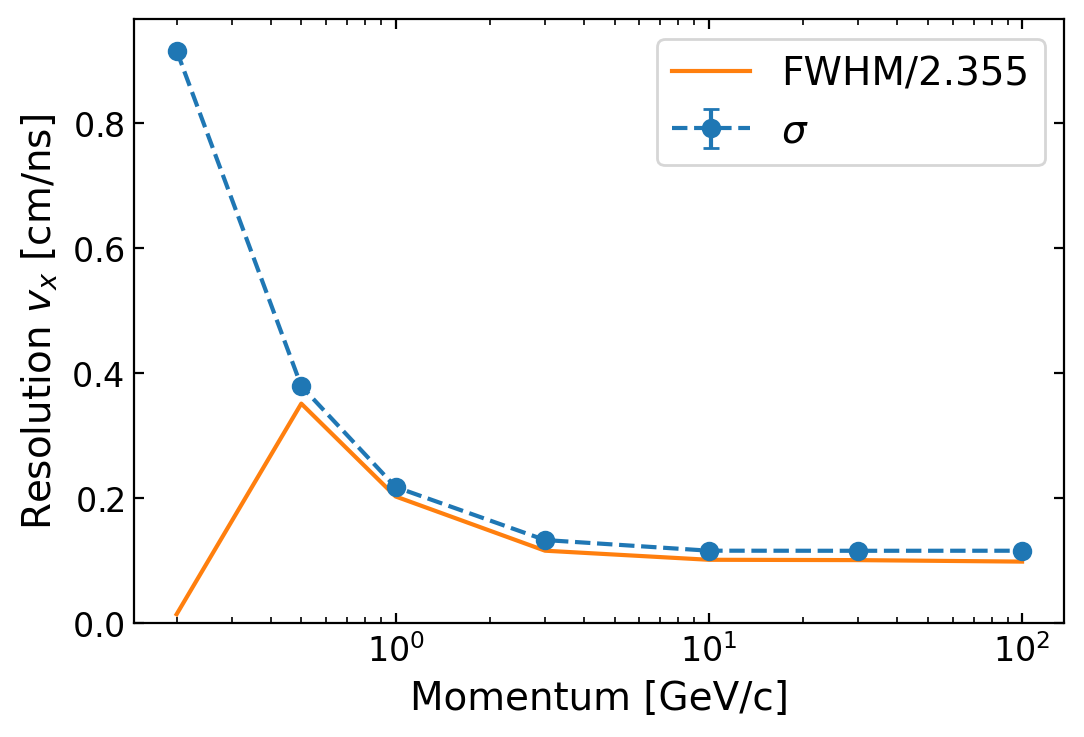

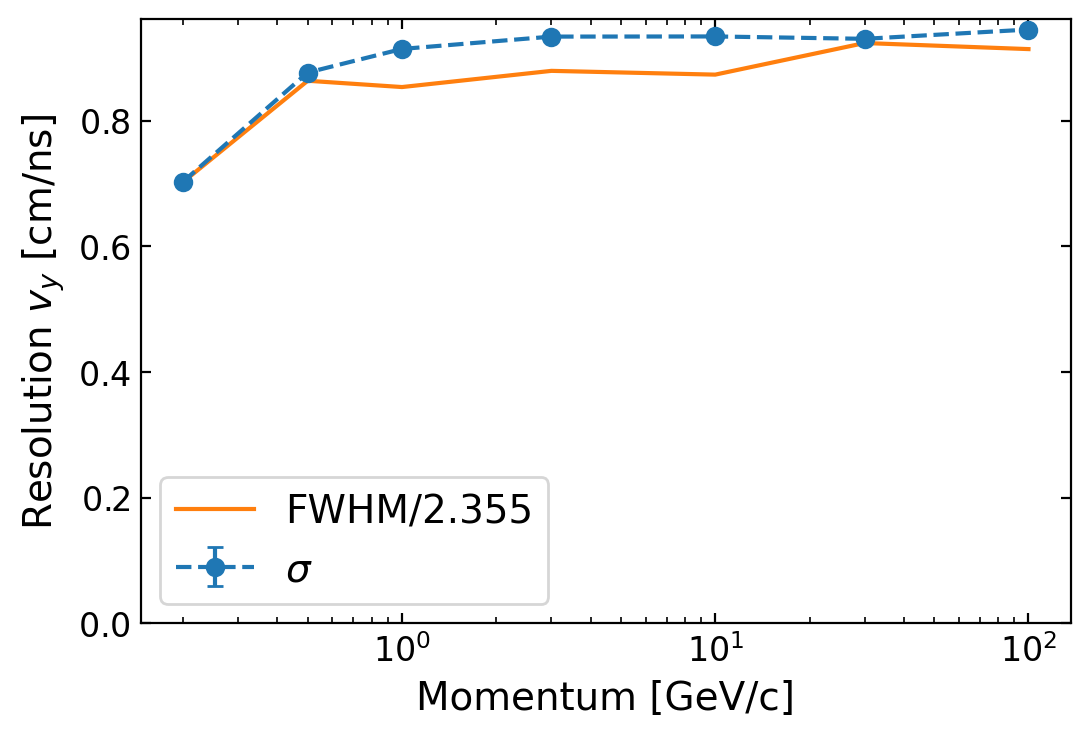

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped


In [51]:
effs=[]
resolutions=[]
for i in range(len(energy_list)):
    data=Data[i]
    if i==0:
        figs = plot_res_pull(data,              label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)
    elif i==len(energy_list)-1:
        figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=True,  plot_gauss1=True)
    else:
        figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)
        
        
    # Calculate efficiency
    eff_i = calc_eff(data)
    effs.append(eff_i)
    
    # Calculate resolution
    res_i = calc_resolution(data)
    resolutions.append(res_i)


# Save spectrum
for i in range(6):
    figure(figs[i])
    savefig(f"Residual_Pull_{data_name}_{PAR_LABELS_RAW[INDS_PAR[i]]}")
    show()
    close() # Use close to not show figures again

    
# Plot efficiency
effs = np.array(effs)    
errorbar(energy_list, effs[:,1,0], yerr=(effs[:,1,1], effs[:,1,2]),fmt="o-",label="$\epsilon_{abs, TIGHT}$")
errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-",label="$\epsilon_{abs, LOOSER}$")
errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt=".-",color="grey", linewidth=2,label="$k_{reconstructible}$")
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
savefig(f"Efficiency_{data_name}")
show()

errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt="o-",color="grey",label="$k_{reconstructible}$")
errorbar(energy_list, effs[:,4,0], yerr=(effs[:,4,1], effs[:,4,2]),fmt="o--",color="C2",label="$\epsilon_{recog}$")
errorbar(energy_list, effs[:,5,0], yerr=(effs[:,5,1], effs[:,5,2]),fmt=".:",color="C3", linewidth=2,label="$\epsilon_{param}$")
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
savefig(f"Efficiency_breakdown_{data_name}")
show()


# Plot Resolution
resolutions = np.array(resolutions)
for i  in range(6):
    errorbar(energy_list[1:], resolutions[1:,0,i], yerr= resolutions[1:,1,i], label="$\sigma$",fmt="o--", capsize=3)
    plot(energy_list[1:], resolutions[1:,2,i]/2.355, label="FWHM/2.355")
    xlabel("Momentum [GeV/c]")
    ylabel("Resolution "+PAR_LABELS[INDS_PAR[i]])
    ylim(bottom=0)
    xscale("log")
    legend()
    savefig(f"Resolution_{data_name}_{PAR_LABELS_RAW[INDS_PAR[i]]}")
    show()